In [60]:
#import dependencies
import requests
import json
from configuration import APIkeys
import pandas as pd
from pathlib import Path
import re
from pandas import json_normalize 
import hvplot.pandas
import warnings
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn import datasets



warnings.filterwarnings("ignore")


In [19]:
#Create a dataframe with the visitors data stored in the csv

park_visitors_csv_file = Path("../Resources/national_park_visitors.csv")

#Read the csv and create variable called park_visitors_data
park_visitors_data= pd.read_csv(park_visitors_csv_file)


#Make it into a dataframe
park_visitors_df = pd.DataFrame(park_visitors_data)

park_visitors_df

,ParkName,Rank,Value,PercentOfTotal
0,Great Smoky Mountains NP,1,"12,937,633",14.59%
1,Grand Canyon NP,2,"4,732,101",5.34%
2,Zion NP,3,"4,692,417",5.29%
3,Rocky Mountain NP,4,"4,300,424",4.85%
4,Acadia NP,5,"3,970,260",4.48%
...,...,...,...,...
58,Isle Royale NP,59,"25,454",0.03%
59,Lake Clark NP & PRES,60,"18,187",0.02%
60,Kobuk Valley NP,61,"16,925",0.02%
61,Gates of the Arctic NP & PRES,62,"9,457",0.01%


In [26]:
#Create a Dataframe from national parks API Data

parks_api_key = APIkeys.parks_api_key

#Establish nps endpoint - with api key
endpoint = f"https://developer.nps.gov/api/v1/parks?limit=600&api_key={parks_api_key}"

#turn the result into a json file
parks_data = requests.get(endpoint).json()

#Normalize data so it all fits into a dataframe
normalized_parks_data = json_normalize(parks_data, 'data')

#Drop the columns we dont need
all_parks_df = pd.DataFrame(normalized_parks_data).drop(columns=[
'id', 
    'url', 
    'latLong', 
    'directionsInfo', 
    'directionsUrl', 
    'addresses', 
    'images', 
    'contacts.phoneNumbers',
    'contacts.emailAddresses',
    
])

#sort by only those named national park or national park and preserve
national_parks_df = all_parks_df.loc[(all_parks_df['designation'] == "National Park") | (all_parks_df['designation'] == "National Park & Preserve")]

#Clean up the " NP" Part of the Park Name
park_visitors_df_clean = park_visitors_df.replace(' NP','', regex=True)

#rename park_visitors_df columns
park_visitors_df_clean.columns = ["Park Name", "Rank", "Visitors", "Percent Of Total"]

#create a copy to start renaming columns
national_parks_df_clean = national_parks_df.copy()

#rename columns
national_parks_df_clean.rename(columns={
    'fullName':'Full Name',
    'parkCode':'Park Code',
    'description':'Description',
    'latitude':'Latitude',
    'longitude':'Longitude',
    'activities':'Activities',
    'topics':'Topics',
    'states':'States',
    'entranceFees':'Entrance Fees',
    'entrancePasses':'Entrance Passes',
    'fees':'Fees',
    'operatingHours':'Operating Hours',
    'weatherInfo':'Weather Info',
    'designation':'Designation',
    'name':'Park Name'
}, inplace = True)

national_parks_df_clean.head()

,Full Name,Park Code,Description,Latitude,Longitude,Activities,Topics,States,Entrance Fees,Entrance Passes,Fees,Operating Hours,Weather Info,Park Name,Designation
1,Acadia National Park,acad,Acadia National Park protects the natural beau...,44.409286,-68.247501,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '00F3C3F9-2D67-4802-81AE-CCEA5D3BA370'...,ME,"[{'cost': '6.00', 'description': 'Vehicle rese...","[{'cost': '70.00', 'description': 'The Acadia ...",[],"[{'exceptions': [], 'description': 'Acadia Nat...","Located on Mount Desert Island in Maine, Acadi...",Acadia,National Park
24,Arches National Park,arch,"Discover a landscape of contrasting colors, la...",38.72261844,-109.5863666,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '7F81A0CB-B91F-4896-B9A5-41BE9A54A27B'...,UT,"[{'cost': '2.00', 'description': 'From April 1...","[{'cost': '55.00', 'description': 'Valid for o...",[],"[{'exceptions': [], 'description': 'Arches Nat...","Arches is part of the Colorado Plateau, a ""hig...",Arches,National Park
29,Badlands National Park,badl,The rugged beauty of the Badlands draws visito...,43.68584846,-102.482942,[{'id': '5F723BAD-7359-48FC-98FA-631592256E35'...,[{'id': '7F81A0CB-B91F-4896-B9A5-41BE9A54A27B'...,SD,"[{'cost': '30.00', 'description': 'Fee covers ...","[{'cost': '55.00', 'description': 'This pass a...",[],"[{'exceptions': [], 'description': 'The park i...",The Badlands weather is variable and unpredict...,Badlands,National Park
35,Big Bend National Park,bibe,There is a place in Far West Texas where night...,29.29817767,-103.2297897,[{'id': '5F723BAD-7359-48FC-98FA-631592256E35'...,[{'id': '7F81A0CB-B91F-4896-B9A5-41BE9A54A27B'...,TX,"[{'cost': '30.00', 'description': 'Admits one ...","[{'cost': '55.00', 'description': 'Big Bend Na...",[],"[{'exceptions': [], 'description': 'Big Bend N...","Big Bend is a desert park, so be prepared for ...",Big Bend,National Park
42,Biscayne National Park,bisc,"Within sight of Miami, yet worlds away, Biscay...",25.490587,-80.21023851,[{'id': '071BA73C-1D3C-46D4-A53C-00D5602F7F0E'...,[{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...,FL,[],[],[],"[{'exceptions': [], 'description': 'Park water...","The park is situated in a subtropical climate,...",Biscayne,National Park


In [29]:
#merge visitor df and park df
combined_park_data_df = park_visitors_df_clean.merge(national_parks_df_clean, on="Park Name", how='left')

combined_park_data_df.dropna(how='any', inplace=True)

print(len(combined_park_data_df))
combined_park_data_df.head()

48


,Park Name,Rank,Visitors,Percent Of Total,Full Name,Park Code,Description,Latitude,Longitude,Activities,Topics,States,Entrance Fees,Entrance Passes,Fees,Operating Hours,Weather Info,Designation
0,Great Smoky Mountains,1,"12,937,633",14.59%,Great Smoky Mountains National Park,grsm,Ridge upon ridge of forest straddles the borde...,35.60116374,-83.50818326,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[],"NC,TN",[],[],[],"[{'exceptions': [], 'description': 'Primary ro...",Elevations in the park range from approximatel...,National Park
1,Grand Canyon,2,"4,732,101",5.34%,Grand Canyon National Park,grca,"Grand Canyon National Park, in Northern Arizon...",36.0001165336,-112.121516363,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,AZ,"[{'cost': '35.00', 'description': 'Admits one ...","[{'cost': '70.00', 'description': 'Available t...",[],"[{'exceptions': [], 'description': 'Both Deser...",This weather varies with cold winters and mild...,National Park
2,Zion,3,"4,692,417",5.29%,Zion National Park,zion,Follow the paths where native people and pione...,37.29839254,-113.0265138,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,UT,"[{'cost': '6.00', 'description': 'Rangers may ...",[],[],"[{'exceptions': [], 'description': 'Zion Natio...",Zion is known for a wide range of weather cond...,National Park
3,Rocky Mountain,4,"4,300,424",4.85%,Rocky Mountain National Park,romo,Rocky Mountain National Park's 415 square mile...,40.3556924,-105.6972879,[{'id': '5F723BAD-7359-48FC-98FA-631592256E35'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,CO,"[{'cost': '30.00', 'description': '1-Day Vehic...","[{'cost': '70.00', 'description': 'RMNP Park-s...",[],"[{'exceptions': [], 'description': 'While cert...","Weather can change quickly in RMNP, due to Roc...",National Park
4,Acadia,5,"3,970,260",4.48%,Acadia National Park,acad,Acadia National Park protects the natural beau...,44.409286,-68.247501,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '00F3C3F9-2D67-4802-81AE-CCEA5D3BA370'...,ME,"[{'cost': '6.00', 'description': 'Vehicle rese...","[{'cost': '70.00', 'description': 'The Acadia ...",[],"[{'exceptions': [], 'description': 'Acadia Nat...","Located on Mount Desert Island in Maine, Acadi...",National Park


In [30]:
#Pull Nearest Cities Data from tomtom api

#set api key
tomtom_api_key = APIkeys.tomtom_api_key

#create base url for tomtom
url = "https://api.tomtom.com/search/2/poiSearch/airport.json"

#create variable to store miles away from national park
radius = 500000

#Results Limit Variable
limit = 20

#establish variable that will track number of large cities (with international airports) nearby
city_number = 0

myArray = []

#loop through the combined datatable

#for each item in the data table
for index, park in combined_park_data_df.iterrows():
    
    #create an empty array to store the number of airports within 300 miles of park
    intl_Airports = []
    
    #store lat and long as varaibles
    lat = park['Latitude']
    long = park['Longitude'] 
    
    #build url based on lat and long pulled from dataframe
    final_url = f"{url}?key={tomtom_api_key}&limit={limit}&lat={lat}&lon={long}&radius={radius}"
    
    #.get() the airports surrounging national park
    nearest_airports = requests.get(final_url).json()
    
    try:
        #loop through all the airports in payload
        for airport in nearest_airports['results']:
            #if the word 'international' appears in an airport's name...
            if 'International' in airport['poi']['name']:
                #add 1 to city_number, indicating another big city is near the national park
                city_number = city_number + 1
    
    except KeyError:
        print('No airports found')
        
    #Add total number of big cities nearby to last column in combined_park_data_df
    park['Big Cities Nearby'] = city_number
    
    #add city_number to array
    myArray.append(city_number)

    #Reset city number before next loop
    city_number = 0

#add array to df
combined_park_data_df['Big Cities Nearby'] = myArray
#print new dataframe
combined_park_data_df.head()


Great Smoky Mountains
Grand Canyon
Zion
Rocky Mountain
Acadia
Yosemite
Yellowstone
Joshua Tree
Cuyahoga Valley
Glacier
Indiana Dunes
Grand Teton
Hot Springs
Olympic
Bryce Canyon
Mount Rainier
Gateway Arch
Arches
Shenandoah
Capitol Reef
Everglades
Death Valley
Badlands
Saguaro
Canyonlands
White Sands
Biscayne
Theodore Roosevelt
Mammoth Cave
Wind Cave
Crater Lake
Big Bend
Petrified Forest
Mesa Verde
Lassen Volcanic
Carlsbad Caverns
Kenai Fjords
Channel Islands
Pinnacles
Voyageurs
Guadalupe Mountains
Congaree
Virgin Islands
Great Basin
Dry Tortugas
North Cascades
Isle Royale
Kobuk Valley


,Park Name,Rank,Visitors,Percent Of Total,Full Name,Park Code,Description,Latitude,Longitude,Activities,Topics,States,Entrance Fees,Entrance Passes,Fees,Operating Hours,Weather Info,Designation,Big Cities Nearby
0,Great Smoky Mountains,1,"12,937,633",14.59%,Great Smoky Mountains National Park,grsm,Ridge upon ridge of forest straddles the borde...,35.60116374,-83.50818326,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[],"NC,TN",[],[],[],"[{'exceptions': [], 'description': 'Primary ro...",Elevations in the park range from approximatel...,National Park,5
1,Grand Canyon,2,"4,732,101",5.34%,Grand Canyon National Park,grca,"Grand Canyon National Park, in Northern Arizon...",36.0001165336,-112.121516363,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,AZ,"[{'cost': '35.00', 'description': 'Admits one ...","[{'cost': '70.00', 'description': 'Available t...",[],"[{'exceptions': [], 'description': 'Both Deser...",This weather varies with cold winters and mild...,National Park,3
2,Zion,3,"4,692,417",5.29%,Zion National Park,zion,Follow the paths where native people and pione...,37.29839254,-113.0265138,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,UT,"[{'cost': '6.00', 'description': 'Rangers may ...",[],[],"[{'exceptions': [], 'description': 'Zion Natio...",Zion is known for a wide range of weather cond...,National Park,3
3,Rocky Mountain,4,"4,300,424",4.85%,Rocky Mountain National Park,romo,Rocky Mountain National Park's 415 square mile...,40.3556924,-105.6972879,[{'id': '5F723BAD-7359-48FC-98FA-631592256E35'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,CO,"[{'cost': '30.00', 'description': '1-Day Vehic...","[{'cost': '70.00', 'description': 'RMNP Park-s...",[],"[{'exceptions': [], 'description': 'While cert...","Weather can change quickly in RMNP, due to Roc...",National Park,1
4,Acadia,5,"3,970,260",4.48%,Acadia National Park,acad,Acadia National Park protects the natural beau...,44.409286,-68.247501,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '00F3C3F9-2D67-4802-81AE-CCEA5D3BA370'...,ME,"[{'cost': '6.00', 'description': 'Vehicle rese...","[{'cost': '70.00', 'description': 'The Acadia ...",[],"[{'exceptions': [], 'description': 'Acadia Nat...","Located on Mount Desert Island in Maine, Acadi...",National Park,5


In [35]:
combined_park_data_df.head(50)


,Park Name,Rank,Visitors,Percent Of Total,Full Name,Park Code,Description,Latitude,Longitude,Activities,Topics,States,Entrance Fees,Entrance Passes,Fees,Operating Hours,Weather Info,Designation,Big Cities Nearby
0,Great Smoky Mountains,1,"12,937,633",14.59%,Great Smoky Mountains National Park,grsm,Ridge upon ridge of forest straddles the borde...,35.60116374,-83.50818326,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[],"NC,TN",[],[],[],"[{'exceptions': [], 'description': 'Primary ro...",Elevations in the park range from approximatel...,National Park,5
1,Grand Canyon,2,"4,732,101",5.34%,Grand Canyon National Park,grca,"Grand Canyon National Park, in Northern Arizon...",36.0001165336,-112.121516363,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,AZ,"[{'cost': '35.00', 'description': 'Admits one ...","[{'cost': '70.00', 'description': 'Available t...",[],"[{'exceptions': [], 'description': 'Both Deser...",This weather varies with cold winters and mild...,National Park,3
2,Zion,3,"4,692,417",5.29%,Zion National Park,zion,Follow the paths where native people and pione...,37.29839254,-113.0265138,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,UT,"[{'cost': '6.00', 'description': 'Rangers may ...",[],[],"[{'exceptions': [], 'description': 'Zion Natio...",Zion is known for a wide range of weather cond...,National Park,3
3,Rocky Mountain,4,"4,300,424",4.85%,Rocky Mountain National Park,romo,Rocky Mountain National Park's 415 square mile...,40.3556924,-105.6972879,[{'id': '5F723BAD-7359-48FC-98FA-631592256E35'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,CO,"[{'cost': '30.00', 'description': '1-Day Vehic...","[{'cost': '70.00', 'description': 'RMNP Park-s...",[],"[{'exceptions': [], 'description': 'While cert...","Weather can change quickly in RMNP, due to Roc...",National Park,1
4,Acadia,5,"3,970,260",4.48%,Acadia National Park,acad,Acadia National Park protects the natural beau...,44.409286,-68.247501,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '00F3C3F9-2D67-4802-81AE-CCEA5D3BA370'...,ME,"[{'cost': '6.00', 'description': 'Vehicle rese...","[{'cost': '70.00', 'description': 'The Acadia ...",[],"[{'exceptions': [], 'description': 'Acadia Nat...","Located on Mount Desert Island in Maine, Acadi...",National Park,5
5,Yosemite,6,"3,667,550",4.14%,Yosemite National Park,yose,"Not just a great valley, but a shrine to human...",37.84883288,-119.5571873,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,CA,"[{'cost': '35.00', 'description': 'This fee is...","[{'cost': '70.00', 'description': 'Annual pass...",[],"[{'exceptions': [], 'description': 'Yosemite N...","Yosemite National Park covers nearly 1,200 squ...",National Park,8
6,Yellowstone,7,"3,290,242",3.71%,Yellowstone National Park,yell,"On March 1, 1872, Yellowstone became the first...",44.59824417,-110.5471695,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,"ID,MT,WY","[{'cost': '35.00', 'description': 'Unlimited e...","[{'cost': '70.00', 'description': 'Provides un...",[],"[{'exceptions': [], 'description': 'Yellowston...","Yellowstone's weather can vary quite a bit, ev...",National Park,2
7,Joshua Tree,8,"3,058,294",3.45%,Joshua Tree National Park,jotr,"Two distinct desert ecosystems, the Mojave and...",33.91418525,-115.8398125,[{'id': '13A57703-BB1A-41A2-94B8-53B692EB7238'...,[{'id': '7F81A0CB-B91F-4896-B9A5-41BE9A54A27B'...,CA,"[{'cost': '30.00', 'description': '7-day vehic...","[{'cost': '55.00', 'description': 'This pass i...",[],"[{'exceptions': [], 'description': 'Joshua Tre...",Days are typically clear with less than 25% hu...,National Park,5
8,Cuyahoga Valley,9,"2,913,312",3.29%,Cuyahoga Valley National Park,cuva,Though a short distance from the urban areas o...,41.26093905,-81.57116722,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '696

In [36]:
#What does a 300(ish) mile radius look like for national parks?
map_plot_1 = combined_park_data_df.hvplot.points(
    "Latitude",
    "Longitude",
    geo = True,
    tiles = "OSM"
)

map_plot_1

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Latitude,Longitude]

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

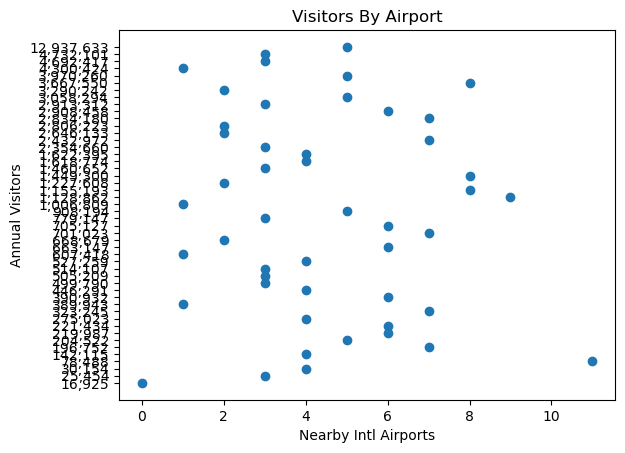

In [63]:
#build a scatter plot to correlate nearby cities to park visitors

x_axis = combined_park_data_df["Big Cities Nearby"]
y_axis = combined_park_data_df["Visitors"]
plt.scatter(x_axis,y_axis , marker="o", vmin=0, vmax=13000000)

plt.gca().invert_yaxis()


plt.title("Visitors By Airport")
plt.ylabel("Annual Visitors")
plt.xlabel("Nearby Intl Airports")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()